# Curve fitting of COVID-19 cases of India

Created by (c) Shardav Bhatt on 17 May 2020


# 1. Introduction

Jupyter Notebook Created by Shardav Bhatt

Data reference: https://www.mohfw.gov.in/ (upto 18 May 2020)

In this notebook, I have considered data of COVID-19 cases in India to perform curve fitting on it. The graphs given data and fitted data are shown. Separate graphs of number of cases, number of deaths and number of recovered are shown for cummulative data as well as daily data. The curve fitting is in terms of polynomial fitting based on method of least square.

# 2. Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 3. Extracting data from file

In [2]:
data = pd.read_csv('data_16June.csv')
d = data.values
dates = d[:,0]
days = np.array(d[:,1],dtype='int16')
cummulative_cases = np.array(d[:,2], dtype='float64')
cummulative_deaths = np.array(d[:,3], dtype='float64')
cummulative_recovered = np.array(d[:,4], dtype='float64')

# 4. Generating daily data from the cummulative data

In [3]:
def daily_data (y):
  daily = [None]*len(y)
  daily[0] = y[0]
  for i in range(1,len(y)):
    daily[i] = y[i]-y[i-1]
  return np.array(daily)

daily_new_cases = daily_data(cummulative_cases)
daily_new_deaths = daily_data(cummulative_deaths)
daily_new_recovered = daily_data(cummulative_recovered)

# 5. Determining proportion of deaths and recovered cases

In [4]:
def proportion (x,y):
  prop = [None]*len(y)
  for i in range(len(y)):
    prop[i] = (y[i]/x[i])*100
  return np.array(prop)

prop_death = proportion (cummulative_cases, cummulative_deaths)
prop_recovered = proportion (cummulative_cases, cummulative_recovered)

# 6. Funtion to check best degreee of polynomial
Here I am trying different degrees of polynomial and checking accuracy of it using Mean Squared Error and $R^2$ score. I am trying polynomials upto degree 100 to check which degree is best.

In [5]:
def fit (x,y):
  for i in range (0,101,5):
    f = np.polyfit(x,y,deg=i)
    fval = np.polyval(f,x)
    print('Degree = %d \tMSE = %10.2f \t R^2 Score = %10.6f' %(i,mean_squared_error(y,fval),r2_score(y,fval)))

# 7. Function to plot data and fitted data

This function plots the given data and the fitted data. Given data is considered from the uploaded data file. Fitted data is generated using $n$ degree polynomial.

In [6]:
def my_plot(x,y,dates,n):
  f = np.polyfit(x,y,deg=n)
  fval = np.polyval(f,x)

  date_list = []
  pos = []
  for i in range(len(dates)):
    if i%5 == 0:
        date_list.append(str(dates[i]).split()[0])
        pos.append(i)

  plt.plot(y,'ro',markersize=2)
  plt.plot(fval,'g',linewidth=1)
  plt.xticks(ticks=pos, rotation='vertical',labels=date_list)
  plt.grid(which = 'both',axis='both')
  plt.text(days[-1],y[-1],str(int(y[-1])))
  plt.ylabel('Number of Cases')
  plt.legend(['Actual Data (https://www.mohfw.gov.in/)','Fitted curve'])
  if n == 1:
    print('\nFitted curve for degree %d is Y = %fx + %f\n' %(n,f[0],f[1]))
  elif n == 2:
    print('\nFitted curve for degree %d is Y = %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2]))
  elif n == 3:
    print('\nFitted curve for degree %d is Y = %fx^3 + %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2],f[3]))
  elif n == 4:
    print('\nFitted curve for degree %d is Y = %fx^4 + %fx^3 + %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2],f[3],f[4]))
  elif n == 5:
    print('\nFitted curve for degree %d is Y = %fx^5 + %fx^4 + %fx^3 + %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2],f[3],f[4],f[5]))
  else:
    pass

# 8. Analysis of Cummulative Cases
It can be observed that after first week of april, the rate of increament of the cases shoot up.

Degree = 0 	MSE = 8873806413.65 	 R^2 Score =   0.000000
Degree = 5 	MSE =  686378.20 	 R^2 Score =   0.999923
Degree = 10 	MSE =  209951.51 	 R^2 Score =   0.999976
Degree = 15 	MSE =  179928.47 	 R^2 Score =   0.999980
Degree = 20 	MSE =   85210.80 	 R^2 Score =   0.999990
Degree = 25 	MSE =   57203.82 	 R^2 Score =   0.999994
Degree = 30 	MSE =   47823.51 	 R^2 Score =   0.999995
Degree = 35 	MSE =   36543.00 	 R^2 Score =   0.999996
Degree = 40 	MSE =   37686.88 	 R^2 Score =   0.999996
Degree = 45 	MSE =   33845.57 	 R^2 Score =   0.999996
Degree = 50 	MSE =   33550.28 	 R^2 Score =   0.999996
Degree = 55 	MSE =   33504.21 	 R^2 Score =   0.999996
Degree = 60 	MSE =   33496.71 	 R^2 Score =   0.999996
Degree = 65 	MSE =   33503.16 	 R^2 Score =   0.999996
Degree = 70 	MSE =   32759.45 	 R^2 Score =   0.999996
Degree = 75 	MSE =   32913.52 	 R^2 Score =   0.999996
Degree = 80 	MSE =   32913.58 	 R^2 Score =   0.999996
Degree = 85 	MSE =   32913.53 	 R^2 Score =   0.999996
Degree = 

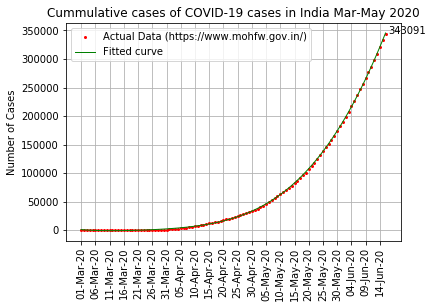

In [7]:
fit (days, cummulative_cases)
my_plot(days, cummulative_cases, dates, 5)
plt.title('Cummulative cases of COVID-19 cases in India Mar-May 2020')
plt.show()

# 9. Analysis of Cummulative deaths

Degree = 0 	MSE = 7158856.10 	 R^2 Score =  -0.000000
Degree = 5 	MSE =    1704.95 	 R^2 Score =   0.999762
Degree = 10 	MSE =     720.04 	 R^2 Score =   0.999899
Degree = 15 	MSE =     325.75 	 R^2 Score =   0.999954
Degree = 20 	MSE =     247.40 	 R^2 Score =   0.999965
Degree = 25 	MSE =     227.81 	 R^2 Score =   0.999968
Degree = 30 	MSE =     209.28 	 R^2 Score =   0.999971
Degree = 35 	MSE =     195.87 	 R^2 Score =   0.999973
Degree = 40 	MSE =     177.62 	 R^2 Score =   0.999975
Degree = 45 	MSE =     103.00 	 R^2 Score =   0.999986
Degree = 50 	MSE =     102.51 	 R^2 Score =   0.999986
Degree = 55 	MSE =     101.20 	 R^2 Score =   0.999986
Degree = 60 	MSE =     101.18 	 R^2 Score =   0.999986
Degree = 65 	MSE =     101.75 	 R^2 Score =   0.999986
Degree = 70 	MSE =      99.33 	 R^2 Score =   0.999986
Degree = 75 	MSE =     100.51 	 R^2 Score =   0.999986
Degree = 80 	MSE =     100.51 	 R^2 Score =   0.999986
Degree = 85 	MSE =     100.51 	 R^2 Score =   0.999986
Degree = 90 

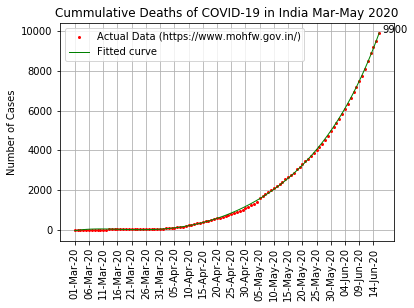

In [8]:
fit (days, cummulative_deaths)
my_plot(days, cummulative_deaths, dates, 5)
plt.title('Cummulative Deaths of COVID-19 in India Mar-May 2020')
plt.show()

# 10. Analysis of Cummulative Recovered cases

Degree = 0 	MSE = 2207232274.69 	 R^2 Score =   0.000000
Degree = 5 	MSE = 1374073.52 	 R^2 Score =   0.999377
Degree = 10 	MSE =  625555.02 	 R^2 Score =   0.999717
Degree = 15 	MSE =  522248.85 	 R^2 Score =   0.999763
Degree = 20 	MSE =  420428.87 	 R^2 Score =   0.999810
Degree = 25 	MSE =  371905.04 	 R^2 Score =   0.999832
Degree = 30 	MSE =  324380.92 	 R^2 Score =   0.999853
Degree = 35 	MSE =  250106.71 	 R^2 Score =   0.999887
Degree = 40 	MSE =  256377.47 	 R^2 Score =   0.999884
Degree = 45 	MSE =  224463.93 	 R^2 Score =   0.999898
Degree = 50 	MSE =  220196.11 	 R^2 Score =   0.999900
Degree = 55 	MSE =  216820.06 	 R^2 Score =   0.999902
Degree = 60 	MSE =  193320.38 	 R^2 Score =   0.999912
Degree = 65 	MSE =  189365.76 	 R^2 Score =   0.999914
Degree = 70 	MSE =  189285.86 	 R^2 Score =   0.999914
Degree = 75 	MSE =  184390.29 	 R^2 Score =   0.999916
Degree = 80 	MSE =  184391.28 	 R^2 Score =   0.999916
Degree = 85 	MSE =  184392.03 	 R^2 Score =   0.999916
Degree = 

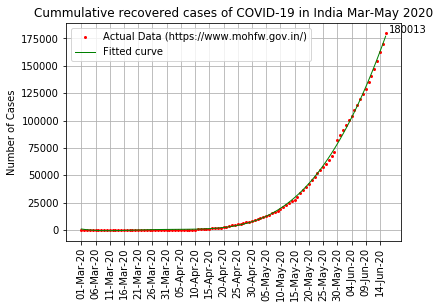

In [9]:
fit (days, cummulative_recovered)
my_plot(days, cummulative_recovered, dates, 5)
plt.title('Cummulative recovered cases of COVID-19 in India Mar-May 2020')
plt.show()

# 11. Analysis of daily new cases

Degree = 0 	MSE = 12945252.92 	 R^2 Score =   0.000000
Degree = 5 	MSE =   90668.84 	 R^2 Score =   0.992996
Degree = 10 	MSE =   86460.57 	 R^2 Score =   0.993321
Degree = 15 	MSE =   75159.02 	 R^2 Score =   0.994194
Degree = 20 	MSE =   52239.33 	 R^2 Score =   0.995965
Degree = 25 	MSE =   50836.19 	 R^2 Score =   0.996073
Degree = 30 	MSE =   47647.95 	 R^2 Score =   0.996319
Degree = 35 	MSE =   46479.61 	 R^2 Score =   0.996410
Degree = 40 	MSE =   45674.23 	 R^2 Score =   0.996472
Degree = 45 	MSE =   44366.22 	 R^2 Score =   0.996573
Degree = 50 	MSE =   44280.93 	 R^2 Score =   0.996579
Degree = 55 	MSE =   44162.85 	 R^2 Score =   0.996588
Degree = 60 	MSE =   43970.87 	 R^2 Score =   0.996603
Degree = 65 	MSE =   43886.10 	 R^2 Score =   0.996610
Degree = 70 	MSE =   43889.34 	 R^2 Score =   0.996610
Degree = 75 	MSE =   43690.08 	 R^2 Score =   0.996625
Degree = 80 	MSE =   43690.17 	 R^2 Score =   0.996625
Degree = 85 	MSE =   43690.12 	 R^2 Score =   0.996625
Degree = 90

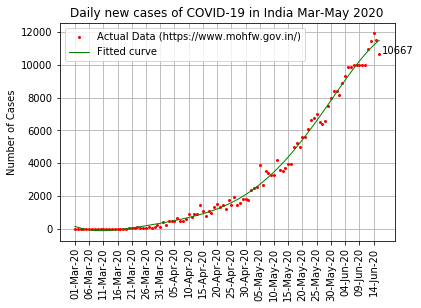

In [10]:
fit (days, daily_new_cases)
my_plot (days, daily_new_cases, dates, 5)
plt.title('Daily new cases of COVID-19 in India Mar-May 2020')
plt.show()

# 12. Analysis of daily new deaths

Degree = 0 	MSE =   10989.61 	 R^2 Score =  -0.000000
Degree = 5 	MSE =     386.46 	 R^2 Score =   0.964834
Degree = 10 	MSE =     345.69 	 R^2 Score =   0.968544
Degree = 15 	MSE =     318.75 	 R^2 Score =   0.970996
Degree = 20 	MSE =     261.85 	 R^2 Score =   0.976173
Degree = 25 	MSE =     258.75 	 R^2 Score =   0.976455
Degree = 30 	MSE =     257.56 	 R^2 Score =   0.976563
Degree = 35 	MSE =     221.10 	 R^2 Score =   0.979881
Degree = 40 	MSE =     188.03 	 R^2 Score =   0.982890
Degree = 45 	MSE =     179.13 	 R^2 Score =   0.983700
Degree = 50 	MSE =     175.52 	 R^2 Score =   0.984029
Degree = 55 	MSE =     174.70 	 R^2 Score =   0.984103
Degree = 60 	MSE =     174.35 	 R^2 Score =   0.984135
Degree = 65 	MSE =     174.25 	 R^2 Score =   0.984144
Degree = 70 	MSE =     174.25 	 R^2 Score =   0.984145
Degree = 75 	MSE =     173.77 	 R^2 Score =   0.984188
Degree = 80 	MSE =     173.77 	 R^2 Score =   0.984188
Degree = 85 	MSE =     173.77 	 R^2 Score =   0.984188
Degree = 90 

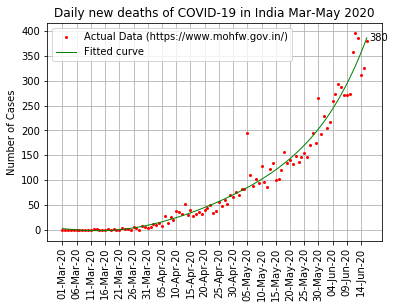

In [11]:
fit (days, daily_new_deaths)
my_plot (days, daily_new_deaths, dates, 5)
plt.title('Daily new deaths of COVID-19 in India Mar-May 2020')
plt.show()

# 13. Analysis of daily new recovered

Degree = 0 	MSE = 5553195.78 	 R^2 Score =   0.000000
Degree = 5 	MSE =  639518.56 	 R^2 Score =   0.884838
Degree = 10 	MSE =  539199.09 	 R^2 Score =   0.902903
Degree = 15 	MSE =  530228.62 	 R^2 Score =   0.904518
Degree = 20 	MSE =  501124.81 	 R^2 Score =   0.909759
Degree = 25 	MSE =  497161.80 	 R^2 Score =   0.910473
Degree = 30 	MSE =  446161.00 	 R^2 Score =   0.919657
Degree = 35 	MSE =  442697.55 	 R^2 Score =   0.920281
Degree = 40 	MSE =  435363.61 	 R^2 Score =   0.921601
Degree = 45 	MSE =  430543.44 	 R^2 Score =   0.922469
Degree = 50 	MSE =  420412.32 	 R^2 Score =   0.924294
Degree = 55 	MSE =  410557.96 	 R^2 Score =   0.926068
Degree = 60 	MSE =  405619.79 	 R^2 Score =   0.926957
Degree = 65 	MSE =  406236.87 	 R^2 Score =   0.926846
Degree = 70 	MSE =  391493.70 	 R^2 Score =   0.929501
Degree = 75 	MSE =  385834.45 	 R^2 Score =   0.930520
Degree = 80 	MSE =  385835.04 	 R^2 Score =   0.930520
Degree = 85 	MSE =  385835.17 	 R^2 Score =   0.930520
Degree = 90 

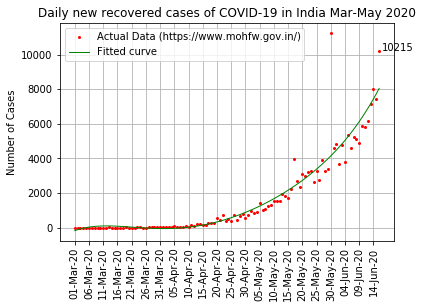

In [12]:
fit (days, daily_new_recovered)
my_plot (days, daily_new_recovered, dates, 5)
plt.title('Daily new recovered cases of COVID-19 in India Mar-May 2020')
plt.show()

# 14. Comparison of proportions of deaths and recovered cases

We can observe that Recovery rate has begun to increase since mid april. Death rate is still constant around 3 and slightly decreasing. These are good signs.

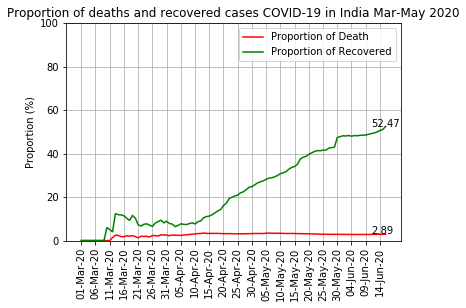

In [13]:
date_list = []
pos = []
for i in range(len(dates)):
  if i%5==0:
      date_list.append(str(dates[i]).split()[0])
      pos.append(i)

plt.plot(prop_death, 'r')
plt.text(len(prop_death)-6,prop_death[-1],str(round(prop_death[-1],2)))
plt.plot(prop_recovered, 'g')
plt.text(len(prop_recovered)-6,prop_recovered[-1],str(round(prop_recovered[-1],2)))
plt.legend(['Proportion of Death','Proportion of Recovered'])
plt.ylabel('Proportion (%)')
plt.grid(which='both',axis='both')
plt.ylim([0,100])
plt.title('Proportion of deaths and recovered cases COVID-19 in India Mar-May 2020')
plt.xticks(ticks=pos, rotation='vertical',labels=date_list)
plt.show()